<div dir="rtl">
    <h2>
        تمرین اول
        (۱۰۰ + ۱۰ امتیاز)
    </h2>
</div>
<p></p>
<div dir="rtl">
بذارید یه حدسی بزنم، خیلی از شما علاقه دارید که دانشمند داده بشید. شاید حدسم غلط باشه ولی خب ما دوست داریم شغل آیندمون در ارتباط با این موضوع باشه و برای همین با خودمون گفتیم که از شما کمک بگیریم. 
مساله‌ی اول برای انجام کار مورد علاقه، پیدا کردن اون کاره! برای اینکه با چشم باز بریم سراغ کاری که دوست داریم، سعی کردیم از یه سایت کاریابی یه سری اطلاعات استخراج کنیم؛ اما خب همه می‌دونیم داده خام خیلی بدرد نمی‌خوره و برای همین به کمک شما نیاز داریم.
</div>

<div dir="rtl">
توجه کنید که توی این تمرین قراره کد بزنید و به هزار روش میشه یک کد روز زد! از این هزار روش معمولا ۹۹۵ تاش روش‌های خوبی نیستن. یا کد اسپاگتی هستن یا از توانایی‌های زبون و فریم ورک استفاده نشده یا نتیجه خیلی مطلوبی به نمایش نمیذارن و ... ما برای اینکه از رفتن به اون ۹۹۵ راه تقریبا اشتباه جلوگیری کنیم یه سری خواسته داریم:
    <ul>
    <li/>
        به هیچ عنوان از حلقه‌ها استفاده نکنید.
    <li/>
            از توانایی‌های کتابخونه pandas استفاده کنید.
    <li/>
    بطور کلی کد پایتون خالی نزنید. تقریبا همه کارهایی که کتابخونه‌های پایتون می‌کنند رو خود شمام می‌تونید بکنید ولی چرخ رو از اول اختراع نکنید. اگر امکان انجام کاری با pandas وجود داره اون کار رو بصورت دیگه انجام ندید.
    <li/>
        نمودارها در جایی که انتخاب نوع نمودار با شماست باید بطور واضح، منظوری رو بیان کنن. یعنی بطور شانسی داده‌ها رو داخل یک نمودار رندم قرار ندید بلکه کمی برای انتخاب نمودارهاتون سلیقه و دقت به خرج بدید.
    </ul>
</div>

<div dir="rtl">
امین روانبخش
۹۶۱۰۹۷۲۵
</div>

<div dir="rtl">
در مرحله اوّل لازمه بتونید اطلاعات رو لود کنید. اطلاعات توی فایل
usjobs.csv همراه این تمرین براتون گذاشته شده.
این اطلاعات رو لود کنید و ۵ سطر اول اون رو به ما نشون بدید که بتونیم یه ایده‌ای راجع به این فایل داشته باشیم.
(۳ امتیاز)    
</div>

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

<div dir="rtl">
یه اتفاق بدی که معمولا برای دیتاست‌ها میوفته اینه که یک‌سری از داده‌ها تهی هستن و این کار معمولا تحلیل داده رو برای 
  ما سخت می‌کنه.  پس بیاید قبل از هرکاری ببینیم چقدر این داده‌ها تهی هستن.  برای این کار تعداد و درصد داده‌های تهی هر ستون رو بگید. 
(۴ امتیاز)
</div>

In [291]:
keys = usjobs_df.keys()
NullCount = []
percent = []
n = usjobs_df.shape[0]

for val in keys:
    s_null = pd.isnull(usjobs_df[val])
    null_count = n- s_null.value_counts()[False]
    NullCount.append(null_count)
    percent.append(null_count/n)
    
null_df = pd.DataFrame({'columns' : keys, 'null count': NullCount, 'percent': percent})
null_df

,columns,null count,percent
0,Unnamed: 0,0,0.000000
1,Job Title,0,0.000000
2,Salary Estimate,1,0.000444
3,Job Description,0,0.000000
4,Rating,0,0.000000
5,Company Name,1,0.000444
6,Location,0,0.000000
7,Headquarters,172,0.076343
8,Size,163,0.072348
9,Founded,660,0.292943


<div dir="rtl">
    همون‌طور که می‌بینید در بعضی از ستون‌ها بیش از ۵۰ درصد داده تهی هستن. ستون‌هایی که این ویژگی رو دارن از مجموعه داده‌ها حذف کنید.
    (۴ امتیاز)
</div>

In [292]:
usjobs_df = usjobs_df.drop(null_df[null_df['percent'] > 0.5]['columns'], axis = 1)
usjobs_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


<div dir="rtl">
در بعضی از ستون‌ها فقط یک داده‌ی تهی وجود داره. سطرهای مربوط به این داده‌های خالی رو از مجموعه‌ی داده‌ها حذف کنید و ابعاد مجموعه داده‌های جدید را نمایش بدید.
    (۴ امتیاز)
</div>

In [293]:
one_nulls = null_df[null_df['null count'] == 1]['columns']

for val in one_nulls:
    print(val)
    print(usjobs_df[usjobs_df[val].isnull()].index)
    usjobs_df = usjobs_df.drop(usjobs_df[usjobs_df[val].isnull()].index)

usjobs_df.shape

Salary Estimate
Int64Index([2149], dtype='int64')
Company Name
Int64Index([1860], dtype='int64')


(2251, 14)

<div dir="rtl">
    در سلول زیر روش‌های متداول برای حل مشکل 
    Data Missing
    رو به طور کامل شرح بدید و برای هر روش بیان شده کاربردهاش رو توی این مجموعه داده بررسی کنید.
    (۴ روش کافیه)
    (۱۲ امتیاز)
</div>

<div dir="rtl">
    
   <br>
    به طور کلی سه نوع data missing 
داریم:
    <ol>
        <li>Missing completely at random:
            وقتی که احتمال گم شدن دیتا ربطی به مقدار و نوع دیتا نداشته باشد.
        </li>
        <li>Missing at random
            این حالت کمی در دنیا واقعای محتمل‌تر است و وقتی را می‌گویند که دیتا گم شده رابطه با ست و نوع آن دیتا دارد.
        </li>
        <li>Missing not at random:
            به حالتی که در دو گروه اول نباشد اختصاص دارد و تنها راه حل در این حالت تعریف یک مدل است.
        </li>
    </ol>
        <br>
        در اینجا مسأله ما چون شناختی از دیتا آن نداریم به گروه اول اختصاص خواهد داشت.
        <br>
        راه حل‌های زیادی برای حل مشکل data missing وجود دارد که ما به بررسی ۴ تای آنها می‌پردازیم:
    <ol>
        <li> بهترین و دقیق‌ترین راه حل این است که در وهله اول سعی کنیم دیتایی از دست نرود و راه آن این است که از ابتدا با دقت نظر دیتا را جمع کنیم: در این دیتا ست ما عملا این راه حل امکان پذیر نیست زیرا دیتاست به ما داده شده است و کار تحقیقاتی ما یه گروه ما نیست. 
        </li>
        <li>
            Listwise or case deletion:
            عموما متداول ترین راه حل این است که دیتا‌های ناقص را حذف کرده و با دیتا‌ها موجود کامل کار کنیم.
            در این دیتاست مثلا ما تا به الان دقیقا اینکار را کردیم و (البته کمی ناقص)
            <br>
            نکته مهم این است که خیلی ها اعتقاد دارند این راه حل در تخمین ما bias ایجاد کند
            اما تجربه نشان داده است اگر دیتاست ما از نوع اول باشد با انجام این نوع پاکیزه ساری بایاس ایجاد نمی‌شود.
        </li>
        <li>
            Pairwise deletion:
            این نوع فقط زمانی دیتا را حذف می‌کند که دیتا‌پوینت ما مقداری را در یک ستون و فیلد نداشته باشد و در بقیه حالات اگر ناتهی باشد از مقدار آن استفاده می‌کند. این راه حل در عمل از حداکثر ظرفیت بالفعل دیتاست استفاده می‌کند.
            <br>
            کاربرد این روش در این دیتاست این است که هیچ دیتا و ستونی را حذف نکنیم و بسته به استفاده ما از هر بخش دیتا (مثلا در این تخمین از کدام سطر و ستون‌ها قراره استفاده کنیم؟)، دیتا‌های ناقص را در آن حالت پیدا کرده و حذف می‌کنیم.
        </li>
        <li>
            Mean substitution:
            این روش میانگین یک مقدار را بجای مقادیر ناقص و گم‌شده قرار می‌دهیم، علت کار این است که معمولا میانگین مقداری منطقی بخصوص برای دیتا رندوم می‌باشد.
            <br>
            استفاده این روش در این دیتاست نیز کاملا منطقی است و می‌تواند همه nan ها را با میانگین ستون خود جایگزین کرد.
            البته هنگامی که درصد زیادی از یک ستون گم شده اصولا استفاده از میانگین منطقی نیست زیرا: اولا: میانگین مقداری غیر دقیق و بدست آمده از تعداد ناکافی داده است و ثانیا: تعداد بسیار زیاد و یکسانی از یک دیتا خواهیم داشت که اصولا تمامی پروسس‌های بعدی ما که از این ستون استفاده می‌کند را تحت شعاع قرار می‌دهد و بی‌معنی می‌کند.
        </li>
        <li>
            Regression imputation:
            این راه حل نوع دقیق قبلی است به گونه‌ای که به ازا دیتا‌های ناقص و به کمک دیگر دیت‌ها و الگوریتم‌های موجود وابسته به نوع آن دیتا مقدار آن را با مقداری تقریبی محاسبه شده جایگزین می‌کنیم. 
            (یعنی بجای استفاده naive از میانگین با محاسبات مقدار درست‌تری را پیشبینی کرده و جایگزین می‌کنیم.)
        </li>
    </ol>
    
</div>

<div dir="rtl">
تا اینجای کار فقط داشتیم داده‌هامون رو تمیز می‌کردیم. از اینجا به بعد می‌خوایم کمی روی اونها کار کنیم. یکی از 
فاکتورهای مهم توی کار کردن میزان حقوقه. پس بیاید و ستون تخمین حقوق رو به دو ستون تبدیل کنید که حداقل و حداکثر حقوق 
درخواستی در اون درج شده.
سپس ستون میانگین حقوق را از این دو ستون جدید به دست بیارید و در انتها پنج داده‌ی اول مجموعه داده رو نمایش بدید.
    (۸ امتیاز)
</div>

In [294]:
salary_string = usjobs_df['Salary Estimate'].str.split('K')
min_salary = []
max_salary = []

for x in salary_string:
    min_salary.append(int(x[0][1:]))
    max_salary.append(int(x[1][2:]))
    
usjobs_df['min salary'] = min_salary
usjobs_df['max salary'] = max_salary
usjobs_df['average salary'] = (usjobs_df['min salary'] + usjobs_df['max salary'])/2
usjobs_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min salary,max salary,average salary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37,66,51.5
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37,66,51.5
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37,66,51.5
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37,66,51.5
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37,66,51.5


<div dir="rtl">
    می‌خوایم یه آمار کلی از حقوق کارها داشته باشیم. کاری که می‌خوایم بکنید اینه که ۵٪ از کارها با بالاترین میانگین حقوق و ۵٪ از کارها با پایین‌ترین میانگین حقوق رو حذف کنید و بعدش یه آمار کلی از میانگین حقوق‌ها بدید و همچنین بگید که بنظرتون چرا ۵٪ از بالا و ۵٪ از پایین رو حذف کردیم؟ آمار کلی‌ای که می‌خوایم شامل:  mean, std, min, max می‌شه.
    (۶ امتیاز)
</div>

<div dir="rtl">
    ...
(پاسخ تشریحی)
</div>

In [295]:
high_salary = np.quantile(usjobs_df['average salary'], 0.95)
low_salary = np.quantile(usjobs_df['average salary'], 0.05)
drop_s = list(usjobs_df['average salary'] > high_salary) or list(usjobs_df['average salary'] < low_salary)
usjobs_df = usjobs_df.drop(usjobs_df[drop_s].index)
usjobs_df.describe()

# todo std

,Unnamed: 0,Rating,Founded,min salary,max salary,average salary
count,2140.000000,2140.000000,1508.000000,2140.000000,2140.000000,2140.000000
mean,1105.929439,3.272336,1977.748674,51.678505,86.092056,68.885280
std,650.974495,1.371254,48.399492,16.246420,23.928607,19.168498
min,0.000000,0.000000,1682.000000,24.000000,38.000000,33.500000
25%,534.750000,3.100000,1969.000000,41.000000,69.000000,56.000000
50%,1098.500000,3.600000,1997.000000,49.000000,86.000000,68.000000
75%,1662.250000,4.000000,2006.000000,60.000000,102.000000,79.500000
max,2252.000000,5.000000,2019.000000,98.000000,151.000000,120.000000


<div dir="rtl">
در ادامه میانگین حقوق پیشنهادی شرکت‌ها رو به دست بیارید (دقت کنید برای هر شرکت باید میانگین رو روی کار‌های مختلف اون شرکت حساب کنید و در نهایت به یک عدد برسید) و بعدش نمودار توزیع تخمینی رو رسم کنید.
    (۷ امتیاز)
    </div>

In [296]:
#replace company name
trueName = []
companyNames = usjobs_df['Company Name']
for val in companyNames:
    trueName.append(val[:-4])
    
usjobs_df['Company Name'] = trueName
usjobs_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min salary,max salary,average salary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37,66,51.5
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37,66,51.5
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37,66,51.5
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37,66,51.5
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37,66,51.5


In [321]:
company_df = usjobs_df.groupby(['Company Name']).mean()[['average salary']]
company_df

,average salary
Company Name,
,59.500000
1199SEIU Funds,63.500000
1872 Consulting,59.000000
2000 east westmoreland st,59.500000
212 Fac,75.500000
22nd Century Staffing,78.500000
22nd Century Technologies,75.700000
2U,59.500000
360pi,77.500000


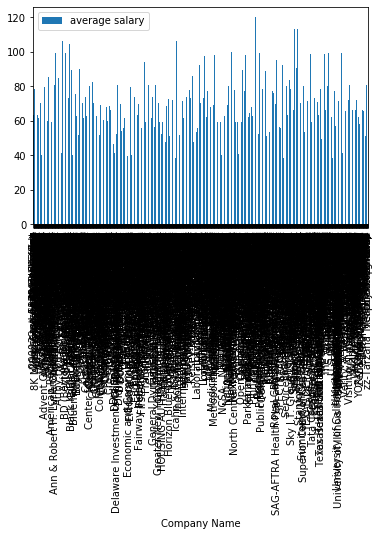

In [299]:
company_ave_salary.plot(kind = 'bar');

<div dir="rtl">
حالا یه دسته‌بندی از رتبه بندی
    (Rating)
    شرکت‌ها و میانگین حقوق اون‌ها بدید.
    در ابتدا به جدولی که در قسمت قبل برای شرکت‌ها به دست آوردید،
    ستون Rating را اضافه کنید.
    حال
    توجه کنید که توی این دسته‌بندی ما حدود 
    Rating
    رو 
    می‌خوایم در نظر بگیریم. پس برای این کار هر ۰.۵ امتیاز رو توی یک دسته قرار میدیم. یعنی شرکت‌ها با امتیاز ۰ تا ۰.۴۹ توی یه دسته و شرکت‌ها با امتیاز ۰.۵ تا ۱ توی یه دسته و ... تا شرکتها با امتیاز ۴.۵ تا ۵ توی یه دسته قرار می‌گیرن. بعد از این دسته‌بندی میانگین حقوق هر دسته رو بدست بیارید و همه این دسته‌ها رو توی یه نمودار معنادار نمایش بدید.
   (۱۰ امتیاز)
 </div>

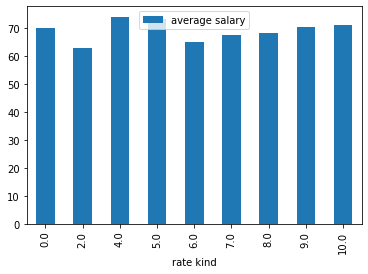

In [331]:
company_df['rate'] = usjobs_df.groupby(['Company Name']).max()['Rating']
company_df['rate kind'] = np.ceil(company_df['rate'] / 0.5)
rate_df = company_df.groupby(['rate kind']).mean()
rate_df[['average salary']].plot(kind = 'bar');

<div dir="rtl">
    به جدول شرکت‌ها ستون
    Revenue
    را اضافه کنید.
    سپس میانگین حقوق رو برای سطوح مختلف درآمدی شرکت‌ها در نمودار
    boxplot
    نمایش دهید.
.راستی حواستون به داده‌های تهی این ستون باشه و با توجه به مقادیر دیگر این ستون بهترین تصمیم رو بگیرید
    (۱۰ امتیاز)
</div>

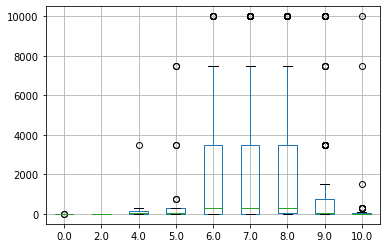

In [481]:
def getRevenue(s):
    
    min_revenue = 0
    max_revenue = 0
    
    nums = re.findall('\d+', s)
    mil = re.findall('million', s)
    bil = re.findall('billion', s)
    
    if len(nums) == 2:
        if len(mil) >= 1:
            min_revenue = float(nums[0])
            if len(bil) == 0:
                max_revenue = float(nums[1])
            else:
                max_revenue = float(nums[1]) * 1000
        else:
            min_revenue = float(nums[0]) * 1000
            max_revenue = float(nums[1]) * 1000

    if len(nums) == 1:
        if len(mil) == 1:
            min_revenue = float(nums[0])
            max_revenue = float(nums[0])
        elif len(bil) == 1:
            min_revenue = float(nums[0]) * 1000
            max_revenue = float(nums[0]) * 1000

    return min_revenue, max_revenue

def checkString(s):
    if not len(re.findall('nan', s)) == 0:
        return False
    
    if not len(re.findall('Unknown', s)) == 0:
        return False
    
    return True

company_name = (list(company_df.index))
company_with_revenue = []
min_rev = []
max_rev = []

for val in company_name:
    rev_string = str(pd.unique(usjobs_df[usjobs_df['Company Name'] == val]['Revenue'])[0])
    
    if checkString(rev_string):
#         print(rev_string, type(rev_string))
        company_with_revenue.append(val)    
        x = getRevenue(rev_string)
        min_rev.append(x[0])
        max_rev.append(x[1])
    else:
        min_rev.append(np.nan)
        max_rev.append(np.nan)

company_df['min revenue'] = min_rev
company_df['max revenue'] = max_rev
company_df['average revenue'] = (company_df['max revenue'] + company_df['min revenue'])/2

rate_kinds = np.unique(company_df['rate kind'])

boxDic = {}
for val in rate_kinds:
    boxDic[str(val)] = company_df[company_df['rate kind'] == val]['average revenue']
    
rateRev_df = pd.DataFrame(boxDic)
rateRev_df.boxplot();

<div dir="rtl">
این مرحله از کارتون تکراریه و همون کاری که توی مرحله‌ی قبل کردید رو این بار با سایز شرکت‌ها بکنید، ببینیم
می‌شه به جمع بندی از حقوق شرکت‌ها رسید؟
باز هم توجه به داده‌های تهی مهمه که اشکالی در نمایش داده‌هاتون ایجاد نکنند و برای این مرحله هم از  boxplot استفاده کنید.  
    (۵ امتیاز)
</div>

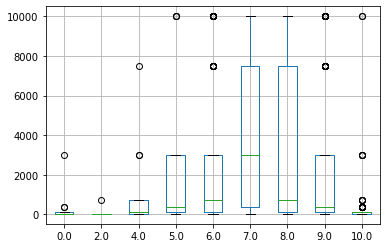

In [482]:
def getEmpSize(s):
    
    min_emp = 0
    max_emp = 0
    
    nums = re.findall('\d+', s)
    
    if len(nums) == 2:
        min_emp = float(nums[0])
        max_emp = float(nums[1])
        
    if len(nums) == 1:
        max_emp = float(nums[0])
        min_emp = float(nums[0])

    return min_emp, max_emp

def checkString(s):
    if not len(re.findall('nan', s)) == 0:
        return False
    
    if not len(re.findall('Unknown', s)) == 0:
        return False
    
    return True

company_name = (list(company_df.index))
min_emp = []
max_emp = []

for val in company_name:
    size_string = str(pd.unique(usjobs_df[usjobs_df['Company Name'] == val]['Size'])[0])
    
    if checkString(size_string):
#         print(rev_string, type(rev_string))
        x = getEmpSize(size_string)
        min_emp.append(x[0])
        max_emp.append(x[1])
    else:
        min_emp.append(np.nan)
        max_emp.append(np.nan)

company_df['min employee'] = min_emp
company_df['max employee'] = max_emp
company_df['average employee'] = (company_df['max employee'] + company_df['min employee'])/2

boxDic = {}
for val in rate_kinds:
    boxDic[str(val)] = company_df[company_df['rate kind'] == val]['average employee']
    
rateEmployee_df = pd.DataFrame(boxDic)
rateEmployee_df.boxplot();

<div dir="rtl">
    توی هر سه مرحله‌ی قبل همبستگی رو حساب کنید و ببینید که آیا این هیچ ارتباطی بین میزان حقوق و آیتم‌های معرفی شده وجود داره؟
(۵ امتیاز)    
</div>

In [565]:
company_df.head(5)

,average salary,rate,rate kind,revenue,min revenue,max revenue,average revenue,min employee,max employee,average employee
Company Name,,,,,,,,,,
,59.5,0.0,0.0,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN,NaN
1199SEIU Funds,63.5,3.2,7.0,$100 to $500 million (USD),100.0,500.0,300.0,1001.0,5000.0,3000.5
1872 Consulting,59.0,5.0,10.0,Unknown / Non-Applicable,NaN,NaN,NaN,1.0,50.0,25.5
2000 east westmoreland st,59.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212 Fac,75.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [584]:
from scipy import stats

rev_df = company_df[~pd.isnull(company_df['average revenue'])]
slope, intercept, r_value, p_value, std_err = stats.linregress(rev_df['average salary'], rev_df['average revenue'])
print("correlation between average salary and average revenue:",r_value)

rate_df = company_df[~pd.isnull(company_df['rate kind'])]
slope, intercept, r_value, p_value, std_err = stats.linregress(rate_df['average salary'], rate_df['rate kind'])
print("correlation between average salary and rate kind:",r_value)

emp_df = company_df[~pd.isnull(company_df['average employee'])]
slope, intercept, r_value, p_value, std_err = stats.linregress(emp_df['average salary'], emp_df['average employee'])
print("correlation between average salary and average employee:",r_value)


correlation between average salary and average revenue: -0.012882466468881066
correlation between average salary and rate kind: -0.004216274258299545
correlation between average salary and average employee: -0.02044427857751399


<div dir="rtl">
    ...
همان طور که از همبستگی‌ها و نمودار‌ها مشخص است رابطه‌ای بین این ستون‌ها نیست.
</div>

<div dir="rtl">
تا الان ما یه ایده‌ای راجع به شرکت‌های مختلف و همچنین میزان حقوقشون و رابطه حقوق با اندازه شرکت و امتیاز شرکت و درآمد سالانه شرکت داریم.
</div>
<div dir="rtl">
چیزی که الان می‌مونه پیدا کردن یه شهودی از جایگاه جغرافیایی شرکت‌هاست. برای این کار از فایل uscities.csv کمک بگیرید. اول این فایل رو باز کنید و ۵ سطر اولش رو لیست کنید.
</div>

In [534]:
uscities_df = pd.read_csv('uscities.csv')
uscities_df.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203.0,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545.0,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938.0,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


<div dir="rtl">
حالا با توجه به ستون
Location
توی فایل اولیه‌ی ما و همچنین با توجه به
ستون‌های state_id و city توی فایل uscities.csv، جدولی شامل ستون‌های
    Location, lat, lng
    به دست بیارید که مقادیر ستون Location 
    یکتا هستند.
    (اگر چند مختصات مختلف برای هر شهر بدست اومد به دلخواه از یکی از آن‌ها استفاده کنید)
    (۷ امتیاز)
    </div>

In [524]:
city_df = uscities_df.groupby(['city', 'state_id']).mean()
locations = list(map(", ".join, city_df.index))
location_df = pd.DataFrame({'Location': locations, 'lat': city_df['lat'].values, 'lng': city_df['lng'].values})
location_df.head(5)

,Location,lat,lng
0,"Aaronsburg, PA",40.4575,-78.72615
1,"Abanda, AL",33.0926,-85.52530
2,"Abbeville, AL",31.5664,-85.25280
3,"Abbeville, GA",31.9925,-83.30680
4,"Abbeville, LA",29.9750,-92.12650


<div dir="rtl">
مقادیر
lat و long 
بدست اومده تو مرحله قبل رو به جدول اصلی کاریابی‌مون اضافه کنید بطوری‌که برای هر فرصت شغلی ما مقدار مورد نظر این دو 
    رو داشته باشیم
.
    (۵ امتیاز)    
</div>

In [526]:
usjobs_df = usjobs_df.merge(location_df)
usjobs_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min salary,max salary,average salary,lat,lng
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37,66,51.5,40.6943,-73.9249
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37,66,51.5,40.6943,-73.9249
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37,66,51.5,40.6943,-73.9249
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37,66,51.5,40.6943,-73.9249
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37,66,51.5,40.6943,-73.9249


<div dir="rtl">
آخرین چیزی که از شما میخوایم نمودار نقشه است! یعنی چی؟ یعنی کارهای پیدا شده رو روی نقشه به نحوی نشون بدید که با یک نگاه بشه حدس زد که توی کدوم محدوده تعداد کارهای پیشنهاد شده بیشتره!
    (می‌توانید از کتابخانه folium استفاده کنید.)
    (۱۰ امتیاز)
    </div>

In [529]:
# pip install folium
import folium


In [552]:
lat0 = 40
lng0 = -100

map_osm = folium.Map(location=[lat0, lng0], zoom_start = 4)

lats = list(usjobs_df['lat'])
lngs = list(usjobs_df['lng'])
n = len(lats)

for i in range(n):
    folium.Marker(location=[lats[i], lngs[i]]).add_to(map_osm)
    
map_osm

<div dir="rtl">
    <h3>امتیازی</h3>
    <p></p>
با تحلیل روابط بین ستون‌های مختلف جدول سعی کنید اطلاعات ارزشمندی پیدا کنید.
مانند پیدا کردن اختلاف حقوق محسوس بین مقادیر مختلف یک ستون و ...
    (۱۰ امتیاز)
</div>

<div dir="rtl">
    <p></p>
همان طور که در یکی از قسمت‌ها نمودار حقوق برحسب امتیاز رو رسم کردیم در امتیاز ۷ و ۸ ماکزیمم حقوق رو داشتیم و هر چه به سمت امتیاز‌های  کمتر و بیشتر می رفتیم میانگین حقوق به تدریج کاهش میافت. با توجه به این می توان گفت در صورتی که می خواهید بیشترین درآمد را داشته باشید به شرکتی با امتیاز ۷ و ۸ مراجعه کنید. 
</div>